<a href="https://www.kaggle.com/theyazilimci/campus-recruitment-97-score?scriptVersionId=83384629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Campus Recruitment

In this notebook we will try to answer these questions.
* Which factor influenced a candidate in getting placed?
* Does percentage matters for one to get placed?
* Which degree specialization is much demanded by corporate?
* Play with the data conducting all statistical tests.

At the end we'll use DecisionTreeClassifier to predict if a student will be placed or not depending on the given data.


# Data Import & Information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


We can observe some Null rows for the columns salary

In [5]:
df.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [6]:
df['salary'].mean()

288655.4054054054

In [7]:
df.groupby('degree_t')['salary'].mean()

degree_t
Comm&Mgmt    278627.450980
Others       280400.000000
Sci&Tech     314609.756098
Name: salary, dtype: float64

Student in Science and Tech get more money than others 

In [8]:
df.groupby('gender')['salary'].mean()

gender
F    267291.666667
M    298910.000000
Name: salary, dtype: float64

Male earn more money than female

# Plot data 

<AxesSubplot:xlabel='gender', ylabel='salary'>

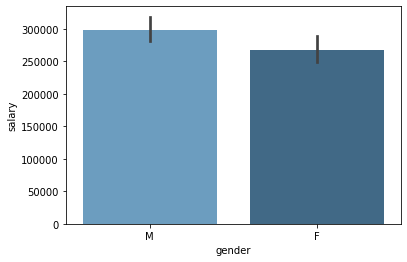

In [9]:
sns.barplot(x='gender',y='salary',data=df,palette="Blues_d")

<AxesSubplot:xlabel='degree_t', ylabel='salary'>

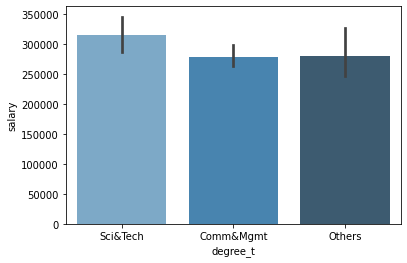

In [10]:
sns.barplot(x='degree_t',y='salary',data=df,palette="Blues_d")

<AxesSubplot:xlabel='gender', ylabel='count'>

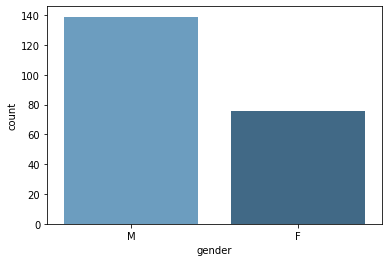

In [11]:
sns.countplot(x='gender',data=df,palette="Blues_d")

<AxesSubplot:xlabel='workex', ylabel='salary'>

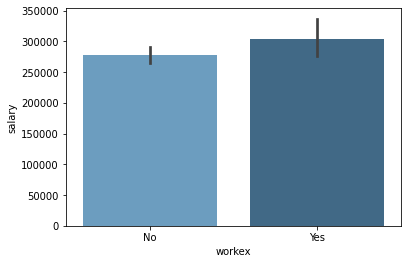

In [12]:
sns.barplot(x="workex",y="salary",data=df,palette="Blues_d")

<AxesSubplot:xlabel='status', ylabel='degree_p'>

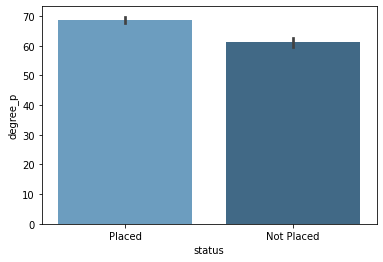

In [13]:

sns.barplot(x="status",y="degree_p",data=df,palette="Blues_d")

placed person arehigher degree than not_placed 

<AxesSubplot:xlabel='workex', ylabel='degree_p'>

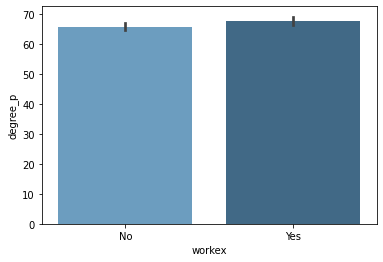

In [14]:
sns.barplot(x="workex",y="degree_p",data=df,palette="Blues_d")

<AxesSubplot:xlabel='gender', ylabel='degree_p'>

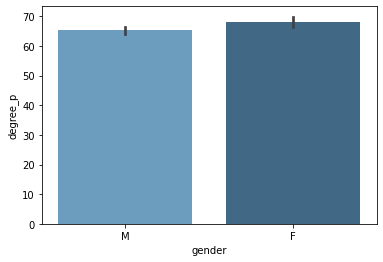

In [15]:
sns.barplot(x="gender",y="degree_p",data=df,palette="Blues_d")

Female have better degree than male 

<AxesSubplot:xlabel='ssc_b', ylabel='salary'>

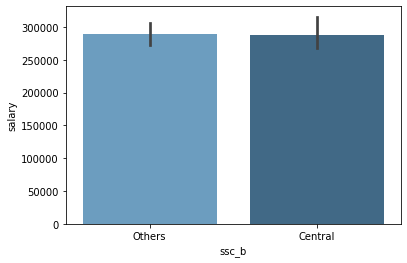

In [16]:
sns.barplot(x="ssc_b",y="salary",data=df,palette="Blues_d")

<AxesSubplot:xlabel='specialisation', ylabel='salary'>

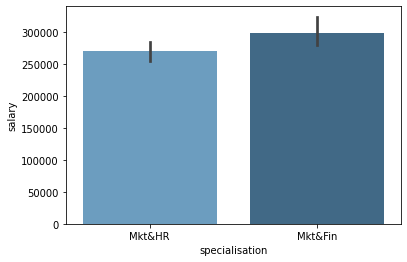

In [17]:
sns.barplot(x="specialisation",y="salary",data=df,palette="Blues_d")

# Global plot

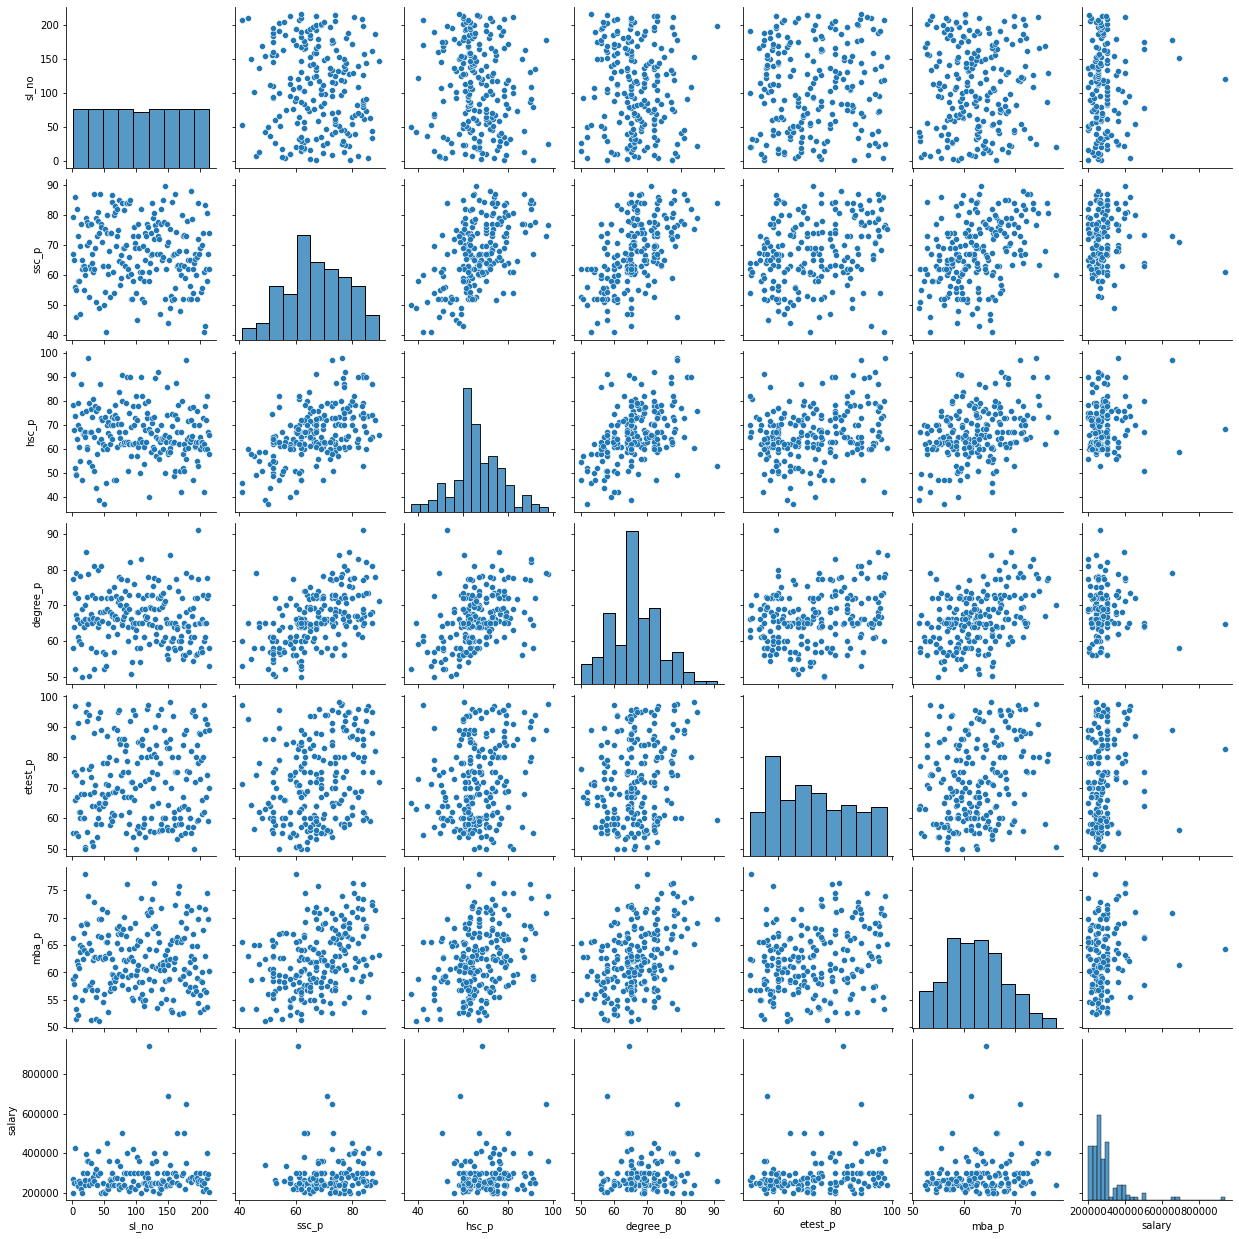

In [18]:
sns.pairplot(data=df,palette="Blues_d")

#### We Can see the correlation (linearity) between different columns

In [19]:
df.groupby('gender')['status'].value_counts()

gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: status, dtype: int64

Male are more recruited than female however we saw above that female got better mark than male 

<AxesSubplot:>

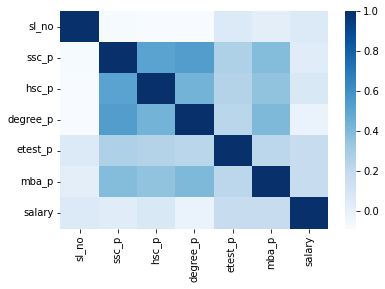

In [20]:
# Check the correlation 
sns.heatmap(df.corr(),cmap="Blues")

if we look at the salary we can say that the degree nor the gender of anything have a real impact to the salary of the student 

<AxesSubplot:xlabel='salary', ylabel='Density'>

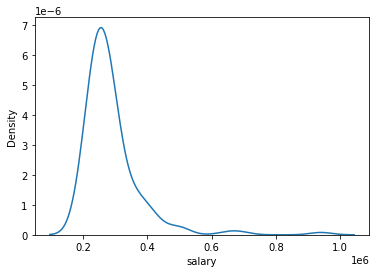

In [21]:
sns.kdeplot(df['salary'])

In [22]:
# we get only categorical data
cols = df.columns

num_cols = df._get_numeric_data().columns
num_cols

categorical_col = list(set(cols) - set(num_cols))

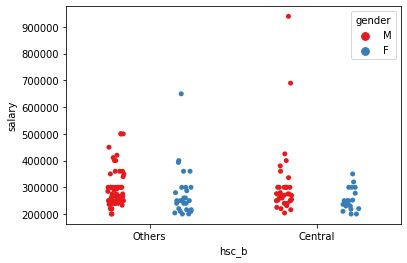

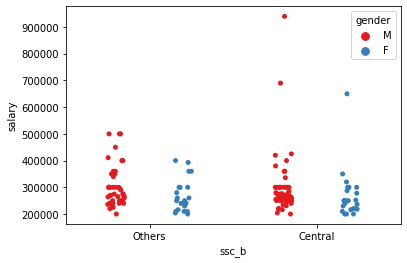

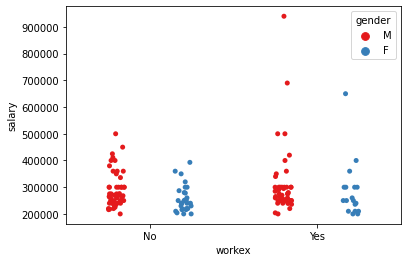

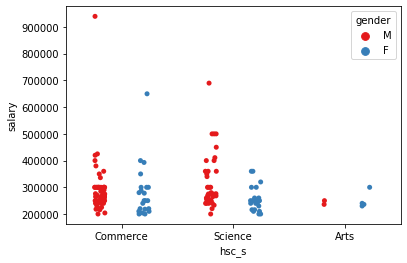

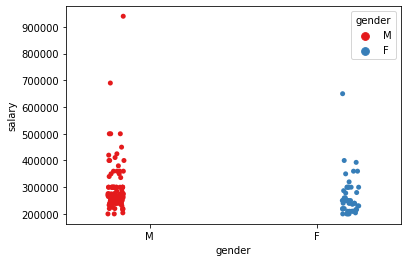

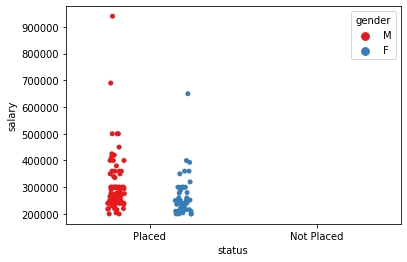

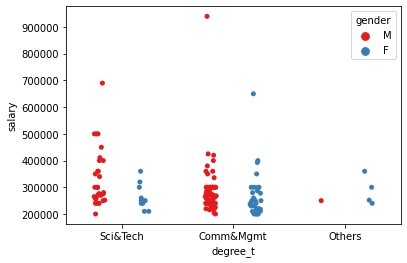

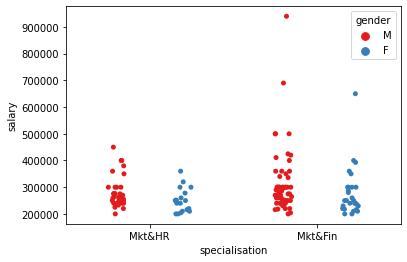

In [23]:
for i in categorical_col:
    plt.figure()
    sns.stripplot(x=i, y="salary",hue='gender',data=df, palette="Set1", dodge=True)

In [24]:
df.groupby('degree_t').count()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,workex,etest_p,specialisation,mba_p,status,salary
degree_t,,,,,,,,,,,,,,
Comm&Mgmt,145,145,145,145,145,145,145,145,145,145,145,145,145,102
Others,11,11,11,11,11,11,11,11,11,11,11,11,11,5
Sci&Tech,59,59,59,59,59,59,59,59,59,59,59,59,59,41


In [25]:
df.groupby('degree_t')['status'].value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

Student in Commerce are more placed than 

# Prediction a DecisionTreeClassifier 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [27]:
labelEncode = LabelEncoder()

for i in categorical_col:
     df[i] = labelEncode.fit_transform(df[i])
        
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [28]:
# people not placed don't have a salary so we fill it with the mean
df = df.fillna(df.mean())
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [29]:
X = df.drop(['sl_no','status'],axis=1)
y = df['status']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(x_test),len(y_test)

(43, 43)

### Build DecisionTreeClassifier

In [30]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
decisionTree.score(x_test,y_test)

0.9767441860465116

In [32]:
y_pred = decisionTree.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [33]:
len(y_test)

43

In [34]:
y_test.head()

200    1
212    1
138    1
176    1
15     1
Name: status, dtype: int64

In [35]:
y_test = y_test.tolist()

In [36]:
number_error = 0

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        number_error += 1
        
number_error 

1

In [37]:
print('confusion matrix: \n',confusion_matrix(y_pred,y_test),'\n')

confusion matrix: 
 [[12  1]
 [ 0 30]] 

